In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# saving the data url

#data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv'

In [3]:
# downloading the data with wget

#!wget $data

In [4]:
credit_card_df = pd.read_csv('AER_credit_card_data.csv')
credit_card_df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [5]:
credit_card_df.isna().sum()

card           0
reports        0
age            0
income         0
share          0
expenditure    0
owner          0
selfemp        0
dependents     0
months         0
majorcards     0
active         0
dtype: int64

In [6]:
credit_card_df.duplicated().sum()

0

In [7]:
credit_card_df.shape

(1319, 12)

In [8]:
credit_card_df.majorcards.value_counts()

1    1078
0     241
Name: majorcards, dtype: int64

The target variable ==> card column

In [9]:
credit_card_df.card.value_counts()

yes    1023
no      296
Name: card, dtype: int64

In [10]:
credit_card_df.dtypes

card            object
reports          int64
age            float64
income         float64
share          float64
expenditure    float64
owner           object
selfemp         object
dependents       int64
months           int64
majorcards       int64
active           int64
dtype: object

Transforming the value of the target variable (card) from `yes` to `1` and `no` to `0`

In [11]:
credit_card_df.card = (credit_card_df.card == 'yes').astype(int)

In [12]:
credit_card_df.card.value_counts()

1    1023
0     296
Name: card, dtype: int64

# Data Splitting with Scikit Learn

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# first split 

df_full_train, df_test = train_test_split(credit_card_df, test_size=0.2, random_state=1)

# second split

df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [15]:
len(df_train), len(df_test), len(df_val)

(791, 264, 264)

In [16]:
df_train.columns

Index(['card', 'reports', 'age', 'income', 'share', 'expenditure', 'owner',
       'selfemp', 'dependents', 'months', 'majorcards', 'active'],
      dtype='object')

In [17]:
# resetting the indexes of the dataframes 

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [18]:
X_train = df_train
X_val = df_val
X_test = df_test

In [19]:
# getting the target variable

y_train = df_train.card.values
y_val = df_val.card.values
y_test = df_test.card.values


In [20]:
# deleting the card variable from the dataframes 

del df_train['card']
del df_val['card']
del df_test['card']

In [21]:
X_train.head()

,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,3,40.50000,4.0128,0.000299,0.00000,no,no,1,12,1,17
1,1,32.33333,6.0000,0.000200,0.00000,yes,no,4,18,1,4
2,1,29.16667,2.2000,0.038205,69.79333,no,no,0,49,1,7
3,1,54.66667,7.2900,0.106536,647.20670,yes,no,2,78,1,9
4,0,25.00000,3.3984,0.000353,0.00000,yes,no,2,29,0,4


In [22]:
X_train.dependents.value_counts()

0    389
1    152
2    135
3     71
4     33
5      6
6      5
Name: dependents, dtype: int64

In [23]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   reports      791 non-null    int64  
 1   age          791 non-null    float64
 2   income       791 non-null    float64
 3   share        791 non-null    float64
 4   expenditure  791 non-null    float64
 5   owner        791 non-null    object 
 6   selfemp      791 non-null    object 
 7   dependents   791 non-null    int64  
 8   months       791 non-null    int64  
 9   majorcards   791 non-null    int64  
 10  active       791 non-null    int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 68.1+ KB


In [24]:
X_train.columns

Index(['reports', 'age', 'income', 'share', 'expenditure', 'owner', 'selfemp',
       'dependents', 'months', 'majorcards', 'active'],
      dtype='object')

In [25]:
categorical_var = ['owner', 'selfemp']

numerical_var = ['reports', 'age', 'income', 'share', 'expenditure',
                 'dependents', 'months', 'majorcards', 'active']

# Question 1

## ROC AUC for feature importance evaluation 

In [26]:
#X_train[numerical_var]

In [27]:
#X_train[X_train.reports < 3].card.mean()

In [28]:
#X_train

### Report vs target variables (roc auc)

In [29]:
report_train = X_train.reports.values
report_train

array([ 3,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  0,  0,  3,  5,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  1,  0,
        0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
        1,  1,  0,  1,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  2,  4,  2,
        0,  1,  0,  0,  1,  1,  0,  0,  2,  0,  0,  0,  0,  0,  1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  2,  1,  1,  0,  0,  0,
        0,  3,  1,  0,  0,  7,  0,  0,  0,  0,  0,  0,  0,  4,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  3,  0,  0,  2,  0,  1,  6,  1,  0,  0,
        0,  0,  0,  0,  0,  0,  1, 14,  5,  0,  0,  0, 12,  0,  0,  0,  0,
        0,  1,  0,  0,  0,  0,  0,  0,  2,  0,  1,  2,  3,  1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  7,  0,  0,  0

In [30]:
# Encoding 

#from sklearn.feature_extraction import DictVectorizer

In [31]:
#report_dicts = X_train[X_train.reports].to_dict(orient='records')


In [32]:
#dv_report = DictVectorizer(sparse=False)

In [33]:
#report_train = dv_report.fit_transform(report_train)

In [34]:
# importing the model

#from sklearn.linear_model import LogisticRegression

In [35]:
#model_report = LogisticRegression()
#model_report.fit(report_train, y_train)

# Part 11

## Question 2
- What's the AUC of this model on the validation dataset? (round to 3 digits)

In [36]:
# Encoding 

from sklearn.feature_extraction import DictVectorizer

Using these columns to train the model 

    ["reports", "age", "income", "share", "expenditure", "dependents", "months", "majorcards", "active", "owner", "selfemp"]

In [37]:
X_train.columns

Index(['reports', 'age', 'income', 'share', 'expenditure', 'owner', 'selfemp',
       'dependents', 'months', 'majorcards', 'active'],
      dtype='object')

In [38]:
# Transforming the data 

train_dicts = X_train[categorical_var + numerical_var].to_dict(orient='records')
train_dicts[0]

{'owner': 'no',
 'selfemp': 'no',
 'reports': 3,
 'age': 40.5,
 'income': 4.0128,
 'share': 0.0002990431,
 'expenditure': 0.0,
 'dependents': 1,
 'months': 12,
 'majorcards': 1,
 'active': 17}

In [39]:
# initialize dictvectorizer
# making the sparse False
dv = DictVectorizer(sparse=False)

In [40]:
# fitting and transform the dicts
X_train = dv.fit_transform(train_dicts)
X_train

array([[1.700000e+01, 4.050000e+01, 1.000000e+00, ..., 1.000000e+00,
        0.000000e+00, 2.990431e-04],
       [4.000000e+00, 3.233333e+01, 4.000000e+00, ..., 1.000000e+00,
        0.000000e+00, 2.000000e-04],
       [7.000000e+00, 2.916667e+01, 0.000000e+00, ..., 1.000000e+00,
        0.000000e+00, 3.820546e-02],
       ...,
       [1.000000e+00, 2.475000e+01, 1.000000e+00, ..., 1.000000e+00,
        0.000000e+00, 8.070774e-02],
       [7.000000e+00, 5.691667e+01, 0.000000e+00, ..., 1.000000e+00,
        0.000000e+00, 6.289540e-02],
       [8.000000e+00, 2.458333e+01, 0.000000e+00, ..., 1.000000e+00,
        0.000000e+00, 5.454546e-04]])

In [41]:
# validation dataset

val_dicts = X_val[categorical_var + numerical_var].to_dict(orient='records')

In [42]:
X_val = dv.fit_transform(val_dicts)
X_val

array([[0.000000e+00, 2.400000e+01, 0.000000e+00, ..., 1.000000e+00,
        0.000000e+00, 5.255475e-02],
       [1.000000e+00, 3.425000e+01, 1.000000e+00, ..., 1.000000e+00,
        0.000000e+00, 6.172840e-04],
       [2.500000e+01, 3.975000e+01, 1.000000e+00, ..., 1.000000e+00,
        0.000000e+00, 1.701942e-02],
       ...,
       [3.000000e+00, 5.233333e+01, 1.000000e+00, ..., 1.000000e+00,
        0.000000e+00, 2.882272e-02],
       [1.600000e+01, 3.133333e+01, 2.000000e+00, ..., 1.000000e+00,
        0.000000e+00, 4.216182e-02],
       [8.000000e+00, 3.075000e+01, 0.000000e+00, ..., 1.000000e+00,
        0.000000e+00, 3.980107e-02]])

In [43]:
# importing the model

from sklearn.linear_model import LogisticRegression

training the logistic regression with these parameters:

    LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [44]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [45]:
# getting the probability of the target variable on validation set

y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([1.00000000e+00, 5.80231554e-02, 1.00000000e+00, 1.95534619e-02,
       1.00000000e+00, 1.00000000e+00, 7.01198798e-02, 1.00000000e+00,
       1.00000000e+00, 9.95731859e-01, 1.38364914e-01, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.38123509e-02,
       1.00000000e+00, 1.00000000e+00, 2.32127953e-01, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 2.85316589e-04,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.17336247e-08, 4.51764783e-04, 1.00000000e+00, 4.44723869e-03,
       1.65674809e-05, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 4.81355796e-04, 1.00000000e+00, 1.00000000e+00,
       3.66674657e-03, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.71474274e-01, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 4.42068323e-04,
      

Setting the prediction probability threshold at 0.5 which is the default

In [46]:
model_decision = (y_pred >= 0.5)

Checking the accuracy of the model

In [47]:
model_decision = model_decision.astype(int)

In [48]:
(y_val == model_decision).mean()

0.9696969696969697

In [49]:
# making a dataframe to the above backend processes

df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = model_decision.astype(int)
df_pred['actual'] = y_val

In [50]:
df_pred

,probability,prediction,actual
0,1.000000,1,1
1,0.058023,0,0
2,1.000000,1,1
3,0.019553,0,0
4,1.000000,1,1
...,...,...,...
259,1.000000,1,1
260,1.000000,1,1
261,1.000000,1,1
262,1.000000,1,1


In [51]:
# get the correct column 

df_pred['correct'] = df_pred.prediction == df_pred.actual

In [52]:
df_pred

,probability,prediction,actual,correct
0,1.000000,1,1,True
1,0.058023,0,0,True
2,1.000000,1,1,True
3,0.019553,0,0,True
4,1.000000,1,1,True
...,...,...,...,...
259,1.000000,1,1,True
260,1.000000,1,1,True
261,1.000000,1,1,True
262,1.000000,1,1,True


In [53]:
# getting the percentage of the correct prediction

df_pred.correct.mean()

0.9696969696969697

In [54]:
# check the correct decision made by the model

(y_val == model_decision).sum()

256

In [55]:
# checking the accuracy manually

256/264

0.9696969696969697

Using sklearn to check the accuracy

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
accuracy_score(y_val, y_pred >= 0.5)

0.9696969696969697

`Plotting the ROC curve using sklearn` 

In [58]:
from sklearn.metrics import roc_curve

In [59]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

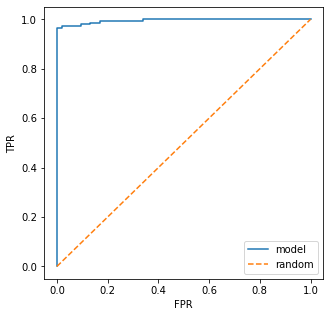

In [60]:
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='model')
plt.plot([0, 1], [0, 1], label='random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

`finding the auc using sklearn`

In [61]:
# using sklearn for it's calculation 

from sklearn.metrics import auc

In [62]:
# the area under curve for our model is 

round(auc(fpr, tpr), 3)

0.995

The AUC is ==> **0.995**

## Question 3
- At which threshold precision and recall curves intersect?

Procedures:

- Compute precision and recall for our model
- Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
- For each threshold, compute precision and recall
- Plot them

**Confusion table**

In [63]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t) 

In [64]:
# finding the true positive of the testing evaluation
# finding the true negative of the testing evaluation 

tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()
tp, tn

(204, 52)

In [65]:
# finding the false positive of the testing evaluation
# finding the false negative of the testing evaluation 

fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()
fp, fn

(1, 7)

In [66]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[ 52,   1],
       [  7, 204]])

In [67]:
# percentage 

(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.2 , 0.  ],
       [0.03, 0.77]])

**Computing Precision and Recall**

In [68]:
precision = tp /(tp + fp)
precision

0.9951219512195122

In [69]:
recall = tp/ (tp+fn)
recall

0.966824644549763

In [70]:
# Computing the different thresholds

scores = []

thresholds = np.linspace(0, 1, 100)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
    
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores.append((t, tp, fp, tn, fn))

In [71]:
scores

[(0.0, 211, 53, 0, 0),
 (0.010101010101010102, 211, 34, 19, 0),
 (0.020202020202020204, 211, 31, 22, 0),
 (0.030303030303030304, 211, 24, 29, 0),
 (0.04040404040404041, 211, 22, 31, 0),
 (0.05050505050505051, 211, 22, 31, 0),
 (0.06060606060606061, 211, 19, 34, 0),
 (0.07070707070707072, 211, 18, 35, 0),
 (0.08080808080808081, 210, 18, 35, 1),
 (0.09090909090909091, 210, 18, 35, 1),
 (0.10101010101010102, 210, 17, 36, 1),
 (0.11111111111111112, 210, 17, 36, 1),
 (0.12121212121212122, 210, 17, 36, 1),
 (0.13131313131313133, 210, 10, 43, 1),
 (0.14141414141414144, 208, 9, 44, 3),
 (0.15151515151515152, 208, 9, 44, 3),
 (0.16161616161616163, 208, 7, 46, 3),
 (0.17171717171717174, 207, 6, 47, 4),
 (0.18181818181818182, 207, 6, 47, 4),
 (0.19191919191919193, 207, 5, 48, 4),
 (0.20202020202020204, 207, 5, 48, 4),
 (0.21212121212121213, 207, 5, 48, 4),
 (0.22222222222222224, 207, 5, 48, 4),
 (0.23232323232323235, 206, 5, 48, 5),
 (0.24242424242424243, 206, 5, 48, 5),
 (0.25252525252525254, 20

In [72]:
columns = ['threshold', 'true_positive', 
           'false_positive', 'true_negative', 
           'false_negative']

df_scores = pd.DataFrame(scores, columns=columns)
df_scores

,threshold,true_positive,false_positive,true_negative,false_negative
0,0.000000,211,53,0,0
1,0.010101,211,34,19,0
2,0.020202,211,31,22,0
3,0.030303,211,24,29,0
4,0.040404,211,22,31,0
...,...,...,...,...,...
95,0.959596,204,0,53,7
96,0.969697,203,0,53,8
97,0.979798,203,0,53,8
98,0.989899,202,0,53,9


In [73]:
# compute precision and recall to the dataframe

df_scores['precision'] = df_scores.true_positive / (df_scores.true_positive + df_scores.false_positive)

df_scores['recall'] = df_scores.true_positive / (df_scores.true_positive + df_scores.false_negative)

df_scores


,threshold,true_positive,false_positive,true_negative,false_negative,precision,recall
0,0.000000,211,53,0,0,0.799242,1.000000
1,0.010101,211,34,19,0,0.861224,1.000000
2,0.020202,211,31,22,0,0.871901,1.000000
3,0.030303,211,24,29,0,0.897872,1.000000
4,0.040404,211,22,31,0,0.905579,1.000000
...,...,...,...,...,...,...,...
95,0.959596,204,0,53,7,1.000000,0.966825
96,0.969697,203,0,53,8,1.000000,0.962085
97,0.979798,203,0,53,8,1.000000,0.962085
98,0.989899,202,0,53,9,1.000000,0.957346


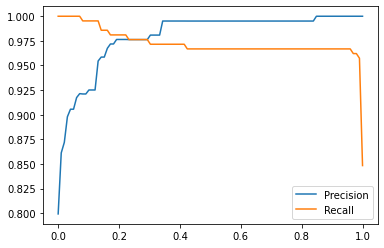

In [74]:
# plotting

plt.plot(df_scores.threshold, df_scores['precision'], label='Precision')
plt.plot(df_scores.threshold, df_scores['recall'], label='Recall')
plt.legend()

There is intersection between recall and precision at ==> **0.3 threshold**

## Question 4
- At which threshold F1 is maximal?

From the plot between recall and precision, there are conflicting when plotted - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

F1 = 2 * P * R / (P + R)

Where P is precision and R is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

In [75]:
df_scores['F1'] = (2 * df_scores.precision * df_scores.recall) / (df_scores.precision + df_scores.recall)

In [76]:
df_scores.head()

,threshold,true_positive,false_positive,true_negative,false_negative,precision,recall,F1
0,0.000000,211,53,0,0,0.799242,1.0,0.888421
1,0.010101,211,34,19,0,0.861224,1.0,0.925439
2,0.020202,211,31,22,0,0.871901,1.0,0.931567
3,0.030303,211,24,29,0,0.897872,1.0,0.946188
4,0.040404,211,22,31,0,0.905579,1.0,0.950450


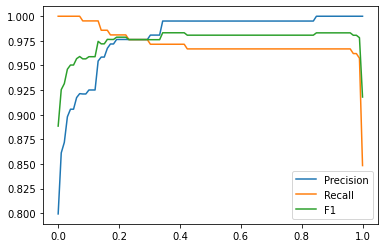

In [77]:
# plotting

plt.plot(df_scores.threshold, df_scores['precision'], label='Precision')
plt.plot(df_scores.threshold, df_scores['recall'], label='Recall')
plt.plot(df_scores.threshold, df_scores['F1'], label='F1')
plt.legend()

The F1 is at maximal at ==> **0.4 threshold**

## Question 5

- How large is standard devidation of the AUC scores across different folds?

Procedures:

Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

    KFold(n_splits=5, shuffle=True, random_state=1)

- Iterate over different folds of df_full_train
- Split the data into train and validation
- Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
- Use AUC to evaluate the model on validation

In [78]:
# importing kfold sklearn

from sklearn.model_selection import KFold

In [79]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

In [80]:
train_idx, val_idx = next(kfold.split(df_full_train))

In [81]:
# since we are splitting by 5, lets check the length

len(train_idx), len(val_idx)

(844, 211)

In [82]:
df_train = df_full_train.iloc[train_idx]
df_val = df_full_train.iloc[val_idx]

In [83]:
def train(df_train, y_train):
    dicts = df_train[categorical_var + numerical_var].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
    
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    return dv, model 

In [84]:
def predict(df, dv, model):
    dicts = df[categorical_var + numerical_var].to_dict(orient='records')
    
    X = dv.fit_transform(dicts)
    
    y_pred = model.predict_proba(X)[:, 1]
    
    return y_pred
    

In [85]:
# importing tqdm

from tqdm.auto import tqdm
from sklearn.metrics import roc_auc_score

In [86]:
# put the above in a for loop

scores = []

for train_idx, val_idx in tqdm(kfold.split(df_full_train)):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]
    
    y_train = df_train.card.values
    y_val = df_val.card.values
    
    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)
    
    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

0it [00:00, ?it/s]

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

In [87]:
scores

[0.9940476190476191,
 0.9943627450980392,
 0.9940711462450593,
 0.9996107939802803,
 1.0]

In [88]:
# computing the mean and standard dev

np.mean(scores), np.std(scores)

(0.9964184608741995, 0.002770384719024136)

In [89]:
print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

0.996 +- 0.003


The standard deviation of the auc across the Kfold is ==> **0.003(3dp)**

## Question 6
- Which C leads to the best mean score?

Using 5-Fold cross-validation to find the best parameter C:
    Procedures:-
- Iterate over the following C values: [0.01, 0.1, 1, 10]
- Initialize KFold with the same parameters as previously
- Use these parameters for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)
- Compute the mean score as well as the std (round the mean and std to 3 decimal digits

In [90]:
def train(df_train, y_train, C=1):
    dicts = df_train[categorical_var + numerical_var].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
    
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model 

In [91]:
def predict(df, dv, model):
    dicts = df[categorical_var + numerical_var].to_dict(orient='records')
    
    X = dv.fit_transform(dicts)
    
    y_pred = model.predict_proba(X)[:, 1]
    
    return y_pred

In [92]:
n_splits = 5

for C in tqdm([0.01, 0.1, 1, 10]):
    
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.card.values
        y_val = df_val.card.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
        
    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/4 [00:00<?, ?it/s]

C=0.01 0.992 +- 0.006
C=0.1 0.995 +- 0.004
C=1 0.996 +- 0.003
C=10 0.996 +- 0.003


The C parameter that leads to the best mean score is at ==> **1**